<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style="color:#fff"><font size="6">Análisis del mercado de combustibles en Argentina</font></h4>
    </strong>
</div>
<br>
<!-- Agrega la imagen justo aquí debajo del título -->
<img src="https://mejorenergia-s2.cdn.net.ar/st2i1700/2023/05/mejorenergia/images/47/71/477196_0462a2e8d1e9e9e27efa28e78a182ffe4cc7834ab03bd965dfada139f081a458/md.webp" alt="Imagen: El Cronista"" style="max-width: 100%;">
<br>
<p></p>

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>1.Importaciones de librerias</font></h4>
    </strong>
</div><br>

In [1]:
#Pandas Libraries
import pandas as pd
import matplotlib.pylab as plt

#Mapping libraries - Folium
import folium 
from folium.plugins import StripePattern


#GeoPandas
import geopandas as gpd

#Numpy
import numpy as np

import json
import requests
import matplotlib.pyplot as plt
import branca 
import seaborn as sns


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from folium.plugins import StripePattern
import geopandas as gpd

import unicodedata

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>Carga de los datos</font></h4>
    </strong>
</div><br>

In [2]:
df = pd.read_csv('C:/Users/zukan/OneDrive/Escritorio/MACHINE LEARNING 2023/precios-eess-2023.csv')
df.head()

anio  mes              operador  nro_inscripcion bandera fecha_de_baja  \
0  2023    1  10 DE SETIEMBRE S.A.             1376    PUMA           NaN   
1  2023    1  10 DE SETIEMBRE S.A.             1376    PUMA           NaN   
2  2023    1  10 DE SETIEMBRE S.A.             1376    PUMA           NaN   
3  2023    1  10 DE SETIEMBRE S.A.             1376    PUMA           NaN   
4  2023    1  10 DE SETIEMBRE S.A.             1376    PUMA           NaN   

            cuit                                       tipo_negocio  \
0  33-64337382-9  Bocas de expendio (venta por menor) Duales (lí...   
1  33-64337382-9  Bocas de expendio (venta por menor) Duales (lí...   
2  33-64337382-9  Bocas de expendio (venta por menor) Duales (lí...   
3  33-64337382-9  Bocas de expendio (venta por menor) Duales (lí...   
4  33-64337382-9  Bocas de expendio (venta por menor) Duales (lí...   

         direccion          localidad     provincia  \
0  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES   
1  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES   
2  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES   
3  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES   
4  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES   

                           producto canal_de_comercializacion  \
0   Nafta (súper) entre 92 y 95 Ron                Al público   
1  Nafta (premium) de más de 95 Ron                Al público   
2                   Gas Oil Grado 2                Al público   
3                   Gas Oil Grado 3                Al público   
4                               GNC                Al público   

   precio_sin_impuestos  precio_con_impuestos   volumen  precio_surtidor  \
0              117.4400               167.136      8.79           170.40   
1              151.7420               207.948      2.25           216.20   
2              140.9520               187.115      6.52           187.60   
3              182.5440               237.443      3.33           250.20   
4               55.3884                67.990  29533.90            67.99   

  no_novimientos exentos  
0             NO       f  
1             NO       f  
2             NO       f  
3             NO       f  
4             NO       f

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228199 entries, 0 to 228198
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   anio                       228199 non-null  int64  
 1   mes                        228199 non-null  int64  
 2   operador                   228199 non-null  object 
 3   nro_inscripcion            228199 non-null  int64  
 4   bandera                    228199 non-null  object 
 5   fecha_de_baja              3108 non-null    object 
 6   cuit                       228199 non-null  object 
 7   tipo_negocio               228199 non-null  object 
 8   direccion                  228186 non-null  object 
 9   localidad                  228199 non-null  object 
 10  provincia                  228199 non-null  object 
 11  producto                   228199 non-null  object 
 12  canal_de_comercializacion  228199 non-null  object 
 13  precio_sin_impuestos       22

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>3. Análisis Exploratorio de Datos </font></h4>
    </strong>
</div><br>

In [4]:
df.isna().sum()

anio                              0
mes                               0
operador                          0
nro_inscripcion                   0
bandera                           0
fecha_de_baja                225091
cuit                              0
tipo_negocio                      0
direccion                        13
localidad                         0
provincia                         0
producto                          0
canal_de_comercializacion         0
precio_sin_impuestos              0
precio_con_impuestos              0
volumen                           0
precio_surtidor                   0
no_novimientos                    0
exentos                        1731
dtype: int64

En nuestro caso la data faltante no es relevante, la base de datos está muy completa, por lo que no hace falta completar ningún valor. Las principales columnas como operador, mes, tipo de combustible y volumen están completas. Las ubicaciones por localidad y provincia también. 

Hay que transformar el tipo de datos a un formato correcto

In [5]:
# Convertir la columna 'fecha_de_baja' a tipo de datos datetime con formato original '01/2022/12'
df['fecha_de_baja'] = pd.to_datetime(df['fecha_de_baja'], format='%d/%Y/%m', errors='coerce')


In [6]:

# Encontrar la fecha más común
fecha_mas_comun = df['fecha_de_baja'].mode()[0]

# Reemplazar los valores nulos con la fecha más común
df['fecha_de_baja'].fillna(fecha_mas_comun, inplace=True)



In [7]:
df['direccion'] = df['direccion'].fillna('').astype(str)
df['localidad'] = df['localidad'].fillna('').astype(str)
df['provincia'] = df['provincia'].fillna('').astype(str)

In [8]:
# Convertir columnas a sus tipos correspondientes
df['operador'] = df['operador'].astype('category')
df['nro_inscripcion'] = df['nro_inscripcion'].astype('int64')
df['bandera'] = df['bandera'].astype('category')
df['cuit'] = df['cuit'].astype(str)
df['tipo_negocio'] = df['tipo_negocio'].astype('category')
df['direccion'] = df['direccion'].astype(str)
df['localidad'] = df['localidad'].astype(str)
df['provincia'] = df['provincia'].astype(str)
df['producto'] = df['producto'].astype('category')
df['canal_de_comercializacion'] = df['canal_de_comercializacion'].astype('category')
df['precio_sin_impuestos'] = df['precio_sin_impuestos'].astype('float64')
df['precio_con_impuestos'] = df['precio_con_impuestos'].astype('float64')
df['volumen'] = df['volumen'].astype('float64')
df['precio_surtidor'] = df['precio_surtidor'].astype('float64')
df['no_novimientos'] = df['no_novimientos'].map({'SI': True, 'NO': False})
df['exentos'] = df['exentos'].map({'t': True, 'f': False}).fillna(False)  # Asignar False a valores no mapeados


# Verificar los tipos de datos después de la conversión
print(df.dtypes)

anio                                  int64
mes                                   int64
operador                           category
nro_inscripcion                       int64
bandera                            category
fecha_de_baja                datetime64[ns]
cuit                                 object
tipo_negocio                       category
direccion                            object
localidad                            object
provincia                            object
producto                           category
canal_de_comercializacion          category
precio_sin_impuestos                float64
precio_con_impuestos                float64
volumen                             float64
precio_surtidor                     float64
no_novimientos                         bool
exentos                                bool
dtype: object


In [28]:
#transformamos el volumnen a litros
#Transformamos los m3 a litros<p>
#L = m3*1000


# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['volumen_lts'] = df["volumen"]*1000

# check your transformed data 
df.head()


anio  mes           operador  nro_inscripcion           bandera  \
206310  2023   10  SAN MIGUEL S.R.L.             1238  SHELL C.A.P.S.A.   
144675  2023    7  SAN MIGUEL S.R.L.             1238  SHELL C.A.P.S.A.   
102824  2023    5  SAN MIGUEL S.R.L.             1238  SHELL C.A.P.S.A.   
60762   2023    3  SAN MIGUEL S.R.L.             1238  SHELL C.A.P.S.A.   
81819   2023    4  SAN MIGUEL S.R.L.             1238  SHELL C.A.P.S.A.   

       fecha_de_baja           cuit  \
206310    2022-08-18  30-68754679-9   
144675    2022-08-18  30-68754679-9   
102824    2022-08-18  30-68754679-9   
60762     2022-08-18  30-68754679-9   
81819     2022-08-18  30-68754679-9   

                                             tipo_negocio  \
206310  Bocas de expendio (venta por menor) Duales (lí...   
144675  Bocas de expendio (venta por menor) Duales (lí...   
102824  Bocas de expendio (venta por menor) Duales (lí...   
60762   Bocas de expendio (venta por menor) Duales (lí...   
81819   Bocas de expendio (venta por menor) Duales (lí...   

                              direccion localidad  ... producto  \
206310  AV. MONSEÑOR PABLO CABRERA 4822   CORDOBA  ...      GNC   
144675  AV. MONSEÑOR PABLO CABRERA 4822   CORDOBA  ...      GNC   
102824  AV. MONSEÑOR PABLO CABRERA 4822   CORDOBA  ...      GNC   
60762   AV. MONSEÑOR PABLO CABRERA 4822   CORDOBA  ...      GNC   
81819   AV. MONSEÑOR PABLO CABRERA 4822   CORDOBA  ...      GNC   

       canal_de_comercializacion precio_sin_impuestos  precio_con_impuestos  \
206310                Al público               155.48                 209.9   
144675                Al público                94.74                 127.9   
102824                Al público                74.55                 114.7   
60762                 Al público                68.50                 104.7   
81819                 Al público                80.29                 114.3   

          volumen  precio_surtidor  no_novimientos  exentos   volumen_lts  \
206310  8314730.0            209.9           False    False  8.314730e+09   
144675  8447980.0            127.9           False    False  8.447980e+09   
102824  8253990.0            114.7           False    False  8.253990e+09   
60762   8993300.0            104.7           False    False  8.993300e+09   
81819   8032070.0            114.3           False    False  8.032070e+09   

        costo_total_con_impuestos  
206310               1.745262e+09  
144675               1.080497e+09  
102824               9.467327e+08  
60762                9.415985e+08  
81819                9.180656e+08  

[5 rows x 21 columns]

Filtremos la información relevante limitaremos la base de dato a la provincia de Buenos Aires, tipo de combustible Gasoil y solo distribuidores, no EESS

In [29]:
dfgrouped=(df.groupby(by=['provincia']).sum("volumen"))
dfgrouped.volumen
dfM=dfgrouped.volumen/1000000
dfM

provincia
BUENOS AIRES           824.026165
CAPITAL FEDERAL        141.435495
CATAMARCA               13.273610
CHACO                    5.718118
CHUBUT                   3.702766
CORDOBA                361.063957
CORRIENTES               1.080054
ENTRE RIOS              48.394938
FORMOSA                  0.810793
JUJUY                   48.332154
LA PAMPA                 7.409110
LA RIOJA                 2.847271
MENDOZA                128.062082
MISIONES                11.721771
NEUQUEN                  7.150417
RIO NEGRO               11.426614
SALTA                   56.887709
SAN JUAN                40.672064
SAN LUIS                36.459986
SANTA CRUZ               0.232633
SANTA FE               158.054231
SANTIAGO DEL ESTERO     33.832216
TIERRA DEL FUEGO         1.188070
TUCUMAN                 91.862749
Name: volumen, dtype: float64

In [30]:
#Volumnen en las provincias
dfM2=pd.DataFrame(dfM).reset_index()
dfM2

provincia     volumen
0          BUENOS AIRES  824.026165
1       CAPITAL FEDERAL  141.435495
2             CATAMARCA   13.273610
3                 CHACO    5.718118
4                CHUBUT    3.702766
5               CORDOBA  361.063957
6            CORRIENTES    1.080054
7            ENTRE RIOS   48.394938
8               FORMOSA    0.810793
9                 JUJUY   48.332154
10             LA PAMPA    7.409110
11             LA RIOJA    2.847271
12              MENDOZA  128.062082
13             MISIONES   11.721771
14              NEUQUEN    7.150417
15            RIO NEGRO   11.426614
16                SALTA   56.887709
17             SAN JUAN   40.672064
18             SAN LUIS   36.459986
19           SANTA CRUZ    0.232633
20             SANTA FE  158.054231
21  SANTIAGO DEL ESTERO   33.832216
22     TIERRA DEL FUEGO    1.188070
23              TUCUMAN   91.862749

#### 3.1 Graficamos los volúmenes por provincias

C:\Users\zukan\AppData\Local\Temp\ipykernel_10848\3010013682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia', y='volumen', data=sum_by_province, palette='viridis')


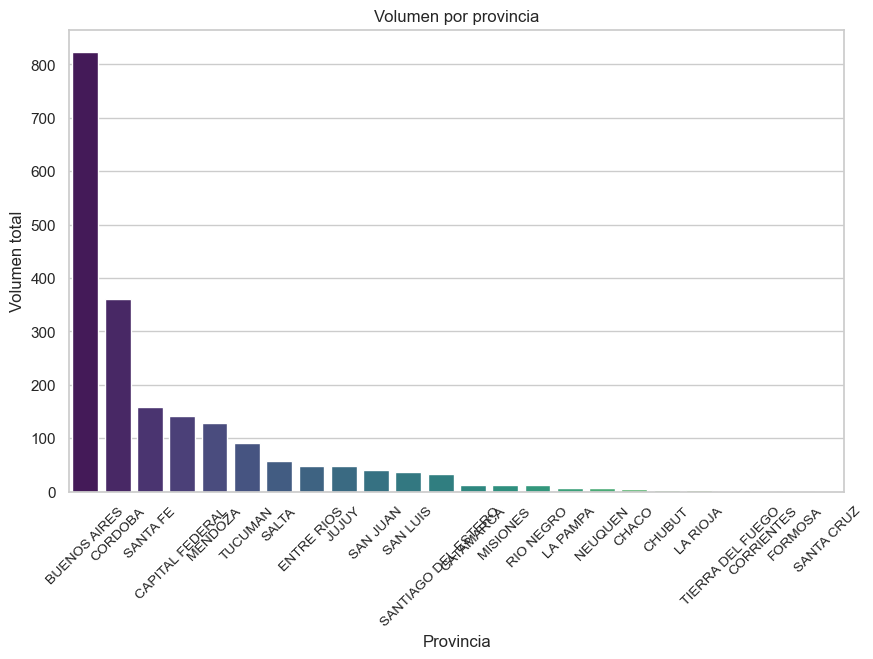

In [31]:
# Ordenar el DataFrame por la suma de volumen en orden descendente
sum_by_province = dfM2.sort_values(by='volumen', ascending=False)

# Graficar usando Seaborn
sns.set(style="whitegrid")  # Configurar el estilo del gráfico

plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

# Utilizar un mapa de colores ('viridis' en este caso)
sns.barplot(x='provincia', y='volumen', data=sum_by_province, palette='viridis')

plt.title('Volumen por provincia')  # Establecer título del gráfico
plt.xlabel('Provincia')  # Establecer etiqueta para el eje X
plt.ylabel('Volumen total')  # Establecer etiqueta para el eje Y

plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje x para una mejor visualización

plt.show()  # Mostrar el gráfico


#### 3.2 Calculamos el costo total con impuestos

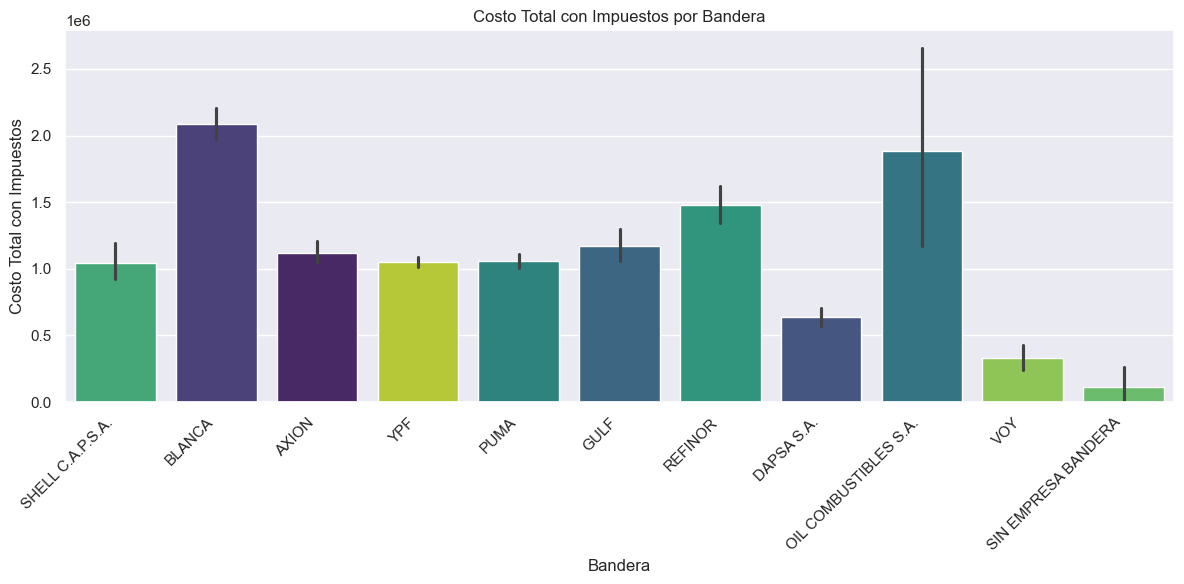

In [37]:

# Asumiendo que tienes una columna 'bandera' en df_gasoil
# y las columnas 'precio_sin_impuestos', 'precio_con_impuestos' y 'volumen'
# Ajusta los nombres de las columnas según tu DataFrame
columna_bandera = 'bandera'

columna_precio_con_impuestos = 'precio_con_impuestos'
columna_volumen = 'volumen'

# Calcular el costo total con impuestos multiplicando el precio con impuestos por el volumen
df['costo_total_con_impuestos'] = df[columna_precio_con_impuestos] * df[columna_volumen]

# Ordenar el DataFrame por costo_total_con_impuestos de forma descendente
df = df.sort_values(by='costo_total_con_impuestos', ascending=False)

# Configurar el estilo de seaborn para mejorar la legibilidad
sns.set_theme()

# Gráfico de barras descendente sin rayitas negras en los bordes
plt.figure(figsize=(12, 6))
sns.barplot(x='bandera', y='costo_total_con_impuestos', data=df, hue='bandera', palette='viridis', edgecolor=None, order=df['bandera'], legend=False)

plt.title('Costo Total con Impuestos por Bandera')
plt.xlabel('Bandera')
plt.ylabel('Costo Total con Impuestos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()



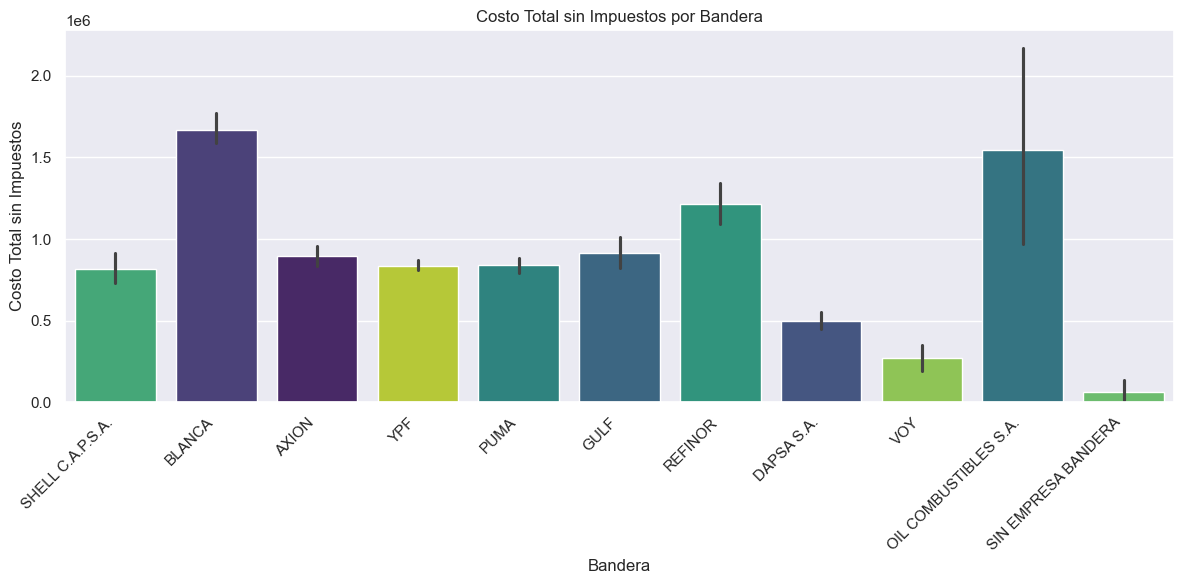

In [38]:

# Asumiendo que tienes una columna 'bandera' en df_gasoil
# y las columnas 'precio_sin_impuestos', 'precio_con_impuestos' y 'volumen'
# Ajusta los nombres de las columnas según tu DataFrame
columna_bandera = 'bandera'
columna_precio_sin_impuestos = 'precio_sin_impuestos'

columna_volumen = 'volumen'

# Calcular el costo total con impuestos multiplicando el precio con impuestos por el volumen
df['costo_total_sin_impuestos'] = df[columna_precio_sin_impuestos] * df[columna_volumen]

# Ordenar el DataFrame por costo_total_con_impuestos de forma descendente
df = df.sort_values(by='costo_total_sin_impuestos', ascending=False)

# Configurar el estilo de seaborn para mejorar la legibilidad
sns.set_theme()

# Gráfico de barras descendente sin rayitas negras en los bordes
plt.figure(figsize=(12, 6))
sns.barplot(x='bandera', y='costo_total_sin_impuestos', data=df, hue='bandera', palette='viridis', edgecolor=None, order=df['bandera'], legend=False)

plt.title('Costo Total sin Impuestos por Bandera')
plt.xlabel('Bandera')
plt.ylabel('Costo Total sin Impuestos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()

#### 3.3 Graficamos un mapa de volumenes en las provincias

In [39]:
#Transformamos de mayuscula a minuscula el listado de provinicas
list=["Buenos Aires", "Capital Federal", "Catamarca", "Chaco", "Chubut", "Córdoba", "Corrientes", "Entre Ríos", "Formosa", "Jujuy", 
      "La Pampa", "La Rioja", "Mendoza", "Misiones", "Neuquén", "Río Negro", 
      "Salta", "San Juan", "San Luis", "Santa Cruz", "Santa Fe", "Santiago del Estero", "Tierra del Fuego", "Tucumán"]
dfM3=dfM2.assign(provincias=list)
dfM3

provincia     volumen           provincias
0          BUENOS AIRES  824.026165         Buenos Aires
1       CAPITAL FEDERAL  141.435495      Capital Federal
2             CATAMARCA   13.273610            Catamarca
3                 CHACO    5.718118                Chaco
4                CHUBUT    3.702766               Chubut
5               CORDOBA  361.063957              Córdoba
6            CORRIENTES    1.080054           Corrientes
7            ENTRE RIOS   48.394938           Entre Ríos
8               FORMOSA    0.810793              Formosa
9                 JUJUY   48.332154                Jujuy
10             LA PAMPA    7.409110             La Pampa
11             LA RIOJA    2.847271             La Rioja
12              MENDOZA  128.062082              Mendoza
13             MISIONES   11.721771             Misiones
14              NEUQUEN    7.150417              Neuquén
15            RIO NEGRO   11.426614            Río Negro
16                SALTA   56.887709                Salta
17             SAN JUAN   40.672064             San Juan
18             SAN LUIS   36.459986             San Luis
19           SANTA CRUZ    0.232633           Santa Cruz
20             SANTA FE  158.054231             Santa Fe
21  SANTIAGO DEL ESTERO   33.832216  Santiago del Estero
22     TIERRA DEL FUEGO    1.188070     Tierra del Fuego
23              TUCUMAN   91.862749              Tucumán

In [40]:
# We import the geoJSON file. 
#This geoJSON File was created by me using https://geojson.io/. It need some improvements but I think its enough for a quick visualization! 

#url = ("../input/geojson-file-provincias-argentinas/")
prov_geo = f"ProvinciasArgentina.geojson"


In [41]:
# We read the file and print it.
geoJSON_df = gpd.read_file(prov_geo)
geoJSON_df.head()

nombre                                           geometry
0              Tucumán  POLYGON ((-66.20361 -26.62782, -66.04980 -26.6...
1  Santiago del Estero  POLYGON ((-64.42108 -26.28356, -65.03906 -27.8...
2                Salta  POLYGON ((-66.11572 -26.21459, -65.85205 -26.3...
3                Jujuy  POLYGON ((-67.22534 -23.69483, -66.47827 -24.2...
4              Formosa  POLYGON ((-62.35840 -24.08659, -58.40332 -26.8...

In [42]:
ARG_state = folium.Map(location=[-26.8083,-65.2176], zoom_start=2)
folium.Choropleth(
    geo_data = prov_geo,                  #json
    name ='choropleth',                  
    data = dfM3,                     
    columns = ['provincias', 'volumen'], #columns to work on
    key_on ='feature.properties.nombre',
    fill_color ='YlOrRd',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.6,
    line_opacity = 0.5,
    #threshold_scale=[0, 10, 20, 30, 100, 200, 300, 500],
    legend_name = "volumen").add_to(ARG_state)
ARG_state

#### 3.4 Analizamos la provincia de Bs As

In [43]:
df_bsas = df[df["provincia"]=="BUENOS AIRES"]
df_bsas.head()

anio  mes                               operador  nro_inscripcion  \
200246  2023   10  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
220025  2023   11  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
159278  2023    8  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
179849  2023    9  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
193298  2023   10                       COSTA AUSTRAL SA            10764   

       bandera fecha_de_baja           cuit  \
200246   AXION    2022-08-18  30-70946580-1   
220025   AXION    2022-08-18  30-70946580-1   
159278   AXION    2022-08-18  30-70946580-1   
179849   AXION    2022-08-18  30-70946580-1   
193298   AXION    2022-08-18  30-71195861-0   

                                             tipo_negocio  \
200246  Revendedor general (venta a granel mayorista, ...   
220025  Revendedor general (venta a granel mayorista, ...   
159278  Revendedor general (venta a granel mayorista, ...   
179849  Revendedor general (venta a granel mayorista, ...   
193298                        Distribuidor (con camiones)   

                    direccion localidad  ... canal_de_comercializacion  \
200246  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
220025  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
159278  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
179849  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
193298       CALLE 114 N° 715   NECOHEA  ...                      Agro   

       precio_sin_impuestos precio_con_impuestos   volumen  precio_surtidor  \
200246               329.22               421.17  574500.0              0.0   
220025               346.46               442.75  514500.0              0.0   
159278               243.36               315.42  708500.0              0.0   
179849               296.07               379.49  558500.0              0.0   
193298               319.32               423.87  483252.0              0.0   

        no_novimientos  exentos  volumen_lts  costo_total_con_impuestos  \
200246           False    False  574500000.0               2.419622e+08   
220025           False    False  514500000.0               2.277949e+08   
159278           False    False  708500000.0               2.234751e+08   
179849           False    False  558500000.0               2.119452e+08   
193298           False    False  483252000.0               2.048360e+08   

        costo_total_sin_impuestos  
200246               1.891369e+08  
220025               1.782537e+08  
159278               1.724206e+08  
179849               1.653551e+08  
193298               1.543120e+08  

[5 rows x 22 columns]

In [44]:
#dos tipos de combustible diésel, el de grado 2 y el de grado 3. 
#“El gasoil grado 2 contiene hasta 500 ppm de azufre en volumen 
# el de grado 3 tiene un máximo de 10 ppm. 

#grado 3 está destinado principalmente al uso en el parque automotor moderno homologado bajo normas Euro 5 y 6
df_bsas_gasoil=df_bsas[df_bsas["producto"].isin(["Gas Oil Grado 2","Gas Oil Grado 3"])]
df_bsas_gasoil.head()

anio  mes                               operador  nro_inscripcion  \
200246  2023   10  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
220025  2023   11  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
159278  2023    8  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
179849  2023    9  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
193298  2023   10                       COSTA AUSTRAL SA            10764   

       bandera fecha_de_baja           cuit  \
200246   AXION    2022-08-18  30-70946580-1   
220025   AXION    2022-08-18  30-70946580-1   
159278   AXION    2022-08-18  30-70946580-1   
179849   AXION    2022-08-18  30-70946580-1   
193298   AXION    2022-08-18  30-71195861-0   

                                             tipo_negocio  \
200246  Revendedor general (venta a granel mayorista, ...   
220025  Revendedor general (venta a granel mayorista, ...   
159278  Revendedor general (venta a granel mayorista, ...   
179849  Revendedor general (venta a granel mayorista, ...   
193298                        Distribuidor (con camiones)   

                    direccion localidad  ... canal_de_comercializacion  \
200246  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
220025  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
159278  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
179849  RUTA NAC 9 Y RUTA 193    ZARATE  ...            Otros sectores   
193298       CALLE 114 N° 715   NECOHEA  ...                      Agro   

       precio_sin_impuestos precio_con_impuestos   volumen  precio_surtidor  \
200246               329.22               421.17  574500.0              0.0   
220025               346.46               442.75  514500.0              0.0   
159278               243.36               315.42  708500.0              0.0   
179849               296.07               379.49  558500.0              0.0   
193298               319.32               423.87  483252.0              0.0   

        no_novimientos  exentos  volumen_lts  costo_total_con_impuestos  \
200246           False    False  574500000.0               2.419622e+08   
220025           False    False  514500000.0               2.277949e+08   
159278           False    False  708500000.0               2.234751e+08   
179849           False    False  558500000.0               2.119452e+08   
193298           False    False  483252000.0               2.048360e+08   

        costo_total_sin_impuestos  
200246               1.891369e+08  
220025               1.782537e+08  
159278               1.724206e+08  
179849               1.653551e+08  
193298               1.543120e+08  

[5 rows x 22 columns]

In [45]:
#verificamos que columnas tenemos
df_bsas_gasoil.columns

Index(['anio', 'mes', 'operador', 'nro_inscripcion', 'bandera',
       'fecha_de_baja', 'cuit', 'tipo_negocio', 'direccion', 'localidad',
       'provincia', 'producto', 'canal_de_comercializacion',
       'precio_sin_impuestos', 'precio_con_impuestos', 'volumen',
       'precio_surtidor', 'no_novimientos', 'exentos', 'volumen_lts',
       'costo_total_con_impuestos', 'costo_total_sin_impuestos'],
      dtype='object')

In [46]:

# Obtén las columnas dummy solo para las categorías "Gas Oil Grado 2" y "Gas Oil Grado 3"
df_dummy = pd.get_dummies(df_bsas_gasoil["producto"])[["Gas Oil Grado 2", "Gas Oil Grado 3"]]

df_dummy.head()

Gas Oil Grado 2  Gas Oil Grado 3
200246             True            False
220025             True            False
159278             True            False
179849             True            False
193298            False             True

In [47]:
df_dummy.rename(columns={'Gas Oil Grado 2':'Diesel-G2', 'Gas Oil Grado 3':'Diesel-G3'}, inplace=True)

df_dummy.head()

Diesel-G2  Diesel-G3
200246       True      False
220025       True      False
159278       True      False
179849       True      False
193298      False       True

In [48]:
# merge data frame "df" and "dummy_variable_1" 
df_gasoil = pd.concat([df_bsas_gasoil, df_dummy], axis=1)
df_gasoil.head()

anio  mes                               operador  nro_inscripcion  \
200246  2023   10  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
220025  2023   11  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
159278  2023    8  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
179849  2023    9  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL            10773   
193298  2023   10                       COSTA AUSTRAL SA            10764   

       bandera fecha_de_baja           cuit  \
200246   AXION    2022-08-18  30-70946580-1   
220025   AXION    2022-08-18  30-70946580-1   
159278   AXION    2022-08-18  30-70946580-1   
179849   AXION    2022-08-18  30-70946580-1   
193298   AXION    2022-08-18  30-71195861-0   

                                             tipo_negocio  \
200246  Revendedor general (venta a granel mayorista, ...   
220025  Revendedor general (venta a granel mayorista, ...   
159278  Revendedor general (venta a granel mayorista, ...   
179849  Revendedor general (venta a granel mayorista, ...   
193298                        Distribuidor (con camiones)   

                    direccion localidad  ... precio_con_impuestos   volumen  \
200246  RUTA NAC 9 Y RUTA 193    ZARATE  ...               421.17  574500.0   
220025  RUTA NAC 9 Y RUTA 193    ZARATE  ...               442.75  514500.0   
159278  RUTA NAC 9 Y RUTA 193    ZARATE  ...               315.42  708500.0   
179849  RUTA NAC 9 Y RUTA 193    ZARATE  ...               379.49  558500.0   
193298       CALLE 114 N° 715   NECOHEA  ...               423.87  483252.0   

       precio_surtidor  no_novimientos  exentos  volumen_lts  \
200246             0.0           False    False  574500000.0   
220025             0.0           False    False  514500000.0   
159278             0.0           False    False  708500000.0   
179849             0.0           False    False  558500000.0   
193298             0.0           False    False  483252000.0   

        costo_total_con_impuestos  costo_total_sin_impuestos  Diesel-G2  \
200246               2.419622e+08               1.891369e+08       True   
220025               2.277949e+08               1.782537e+08       True   
159278               2.234751e+08               1.724206e+08       True   
179849               2.119452e+08               1.653551e+08       True   
193298               2.048360e+08               1.543120e+08      False   

        Diesel-G3  
200246      False  
220025      False  
159278      False  
179849      False  
193298       True  

[5 rows x 24 columns]

In [49]:
print(df_gasoil.dtypes)

anio                                  int64
mes                                   int64
operador                           category
nro_inscripcion                       int64
bandera                            category
fecha_de_baja                datetime64[ns]
cuit                                 object
tipo_negocio                       category
direccion                            object
localidad                            object
provincia                            object
producto                           category
canal_de_comercializacion          category
precio_sin_impuestos                float64
precio_con_impuestos                float64
volumen                             float64
precio_surtidor                     float64
no_novimientos                         bool
exentos                                bool
volumen_lts                         float64
costo_total_con_impuestos           float64
costo_total_sin_impuestos           float64
Diesel-G2                       

#### 3.5 Matriz de correlación

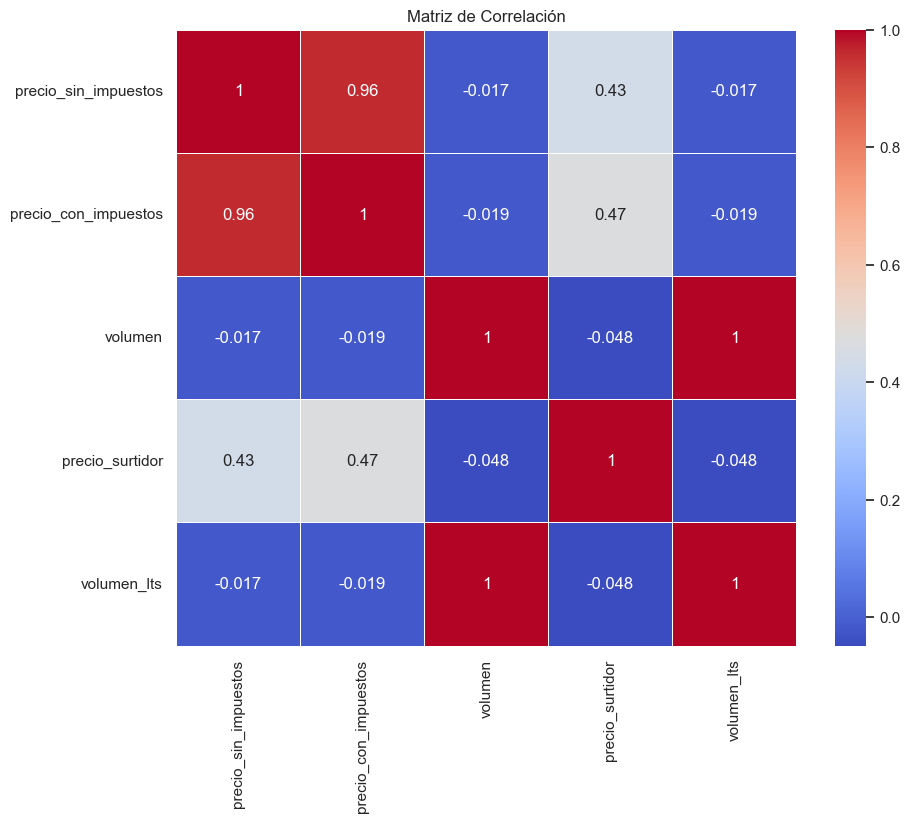

In [25]:
columnas_numericas = df_gasoil.select_dtypes(include='number')

# Excluye las columnas específicas que deseas quitar
columnas_a_excluir = ['anio', 'mes', 'nro_inscripcion']
columnas_numericas = columnas_numericas.drop(columns=columnas_a_excluir, errors='ignore')

# Calcula la correlación entre las columnas numéricas
correlacion = columnas_numericas.corr()

# Configura el estilo de la matriz de correlación
sns.set(style='white')

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


#### 3.6 Analizamos los outliers

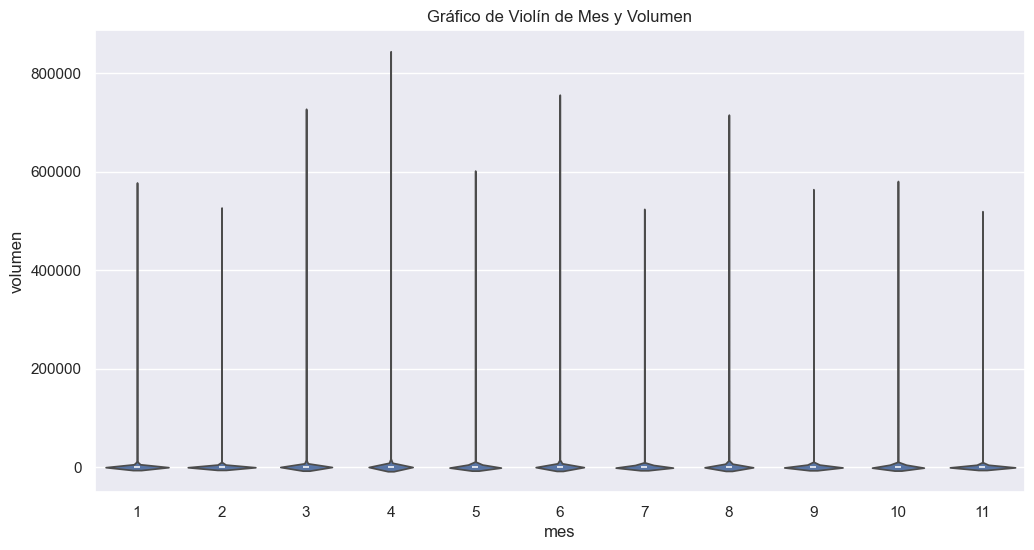

In [50]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='mes', y='volumen', data=df_gasoil)
plt.title('Gráfico de Violín de Mes y Volumen')
plt.show()

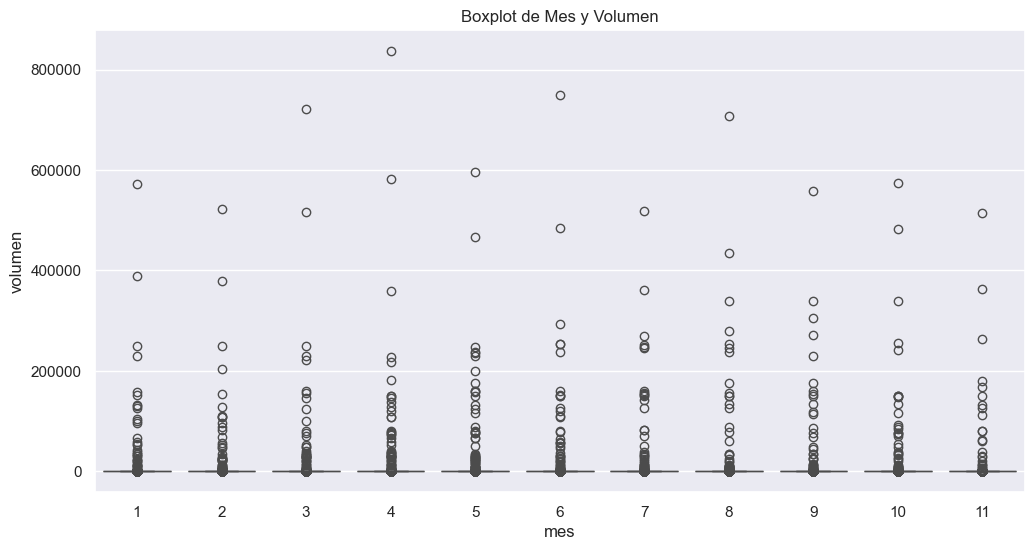

In [51]:
# Crea un boxplot utilizando seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='volumen', data=df_gasoil)
plt.title('Boxplot de Mes y Volumen')
plt.show()

#### 3.7 Descriptivo de los datos

In [28]:
df_gasoil.describe()

anio           mes  nro_inscripcion                  fecha_de_baja  \
count  38332.0  38332.000000     38332.000000                          38332   
mean    2023.0      5.936398      5639.941641  2022-08-11 18:48:07.363038464   
min     2023.0      1.000000       109.000000            2007-04-25 00:00:00   
25%     2023.0      3.000000      2518.000000            2022-08-18 00:00:00   
50%     2023.0      6.000000      5864.000000            2022-08-18 00:00:00   
75%     2023.0      9.000000      8423.000000            2022-08-18 00:00:00   
max     2023.0     11.000000     10914.000000            2023-12-13 00:00:00   
std        0.0      3.144967      3300.587266                            NaN   

       precio_sin_impuestos  precio_con_impuestos       volumen  \
count          38332.000000          38332.000000  3.833200e+04   
mean             235.928920            305.171878  1.100462e+03   
min                1.696000             25.380000  1.000000e-09   
25%              186.610000            245.491750  1.925075e+01   
50%              229.005000            296.387500  4.365500e+01   
75%              272.313250            348.691250  8.527000e+01   
max              900.000000            911.900000  8.366060e+05   
std               65.525465             77.850269  1.672911e+04   

       precio_surtidor   volumen_lts  
count     38332.000000  3.833200e+04  
mean        256.302124  1.100462e+06  
min           0.000000  1.000000e-06  
25%         213.575000  1.925075e+04  
50%         284.300000  4.365500e+04  
75%         337.100000  8.527000e+04  
max         690.000000  8.366060e+08  
std         141.377125  1.672911e+07

#### 3.8 Analisis por bandera

In [52]:
gk = df_gasoil.groupby('bandera')

gk.first()

C:\Users\zukan\AppData\Local\Temp\ipykernel_10848\2345669705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gk = df_gasoil.groupby('bandera')


anio   mes                               operador  \
bandera                                                                      
AXION                  2023.0  10.0  LUBRICANTES Y COMBUSTIBLES D´ATRI SRL   
BLANCA                 2023.0  11.0                  AGROSERVICE DAVIS SRL   
DAPSA S.A.             2023.0   2.0           COMBUSTIBLES EL CIPRES S.R.L   
GULF                   2023.0   8.0                 SERVCIOS DEL CRUCE SRL   
OIL COMBUSTIBLES S.A.     NaN   NaN                                    NaN   
PUMA                   2023.0  10.0                     USHUAIA 0041 S.R.L   
REFINOR                   NaN   NaN                                    NaN   
SHELL C.A.P.S.A.       2023.0   5.0                       FUEL AND FOOD SA   
SIN EMPRESA BANDERA    2023.0  11.0                         PETROTANDIL SA   
VOY                    2023.0   2.0                LAUZURICA JULIO ALBERTO   
YPF                    2023.0  11.0            JUAN V. Y ANTONIO CUCCHIARA   

                       nro_inscripcion fecha_de_baja           cuit  \
bandera                                                               
AXION                          10773.0    2022-08-18  30-70946580-1   
BLANCA                          7247.0    2022-08-18  33-71056046-9   
DAPSA S.A.                      2285.0    2022-08-18  30-70738556-8   
GULF                           10527.0    2022-08-18  30-71596177-2   
OIL COMBUSTIBLES S.A.              NaN           NaT           None   
PUMA                           10866.0    2022-08-18  30-71801325-5   
REFINOR                            NaN           NaT           None   
SHELL C.A.P.S.A.                4310.0    2022-08-18  30-67879971-4   
SIN EMPRESA BANDERA             2371.0    2022-08-18  30-53523084-2   
VOY                            10653.0    2022-08-18  23-13307931-9   
YPF                             2762.0    2022-08-18  30-66417361-8   

                                                            tipo_negocio  \
bandera                                                                    
AXION                  Revendedor general (venta a granel mayorista, ...   
BLANCA                 Revendedor general (venta a granel mayorista, ...   
DAPSA S.A.             Bocas de expendio (venta por menor) Duales (lí...   
GULF                   Bocas de expendio (venta por menor) Combustibl...   
OIL COMBUSTIBLES S.A.                                                NaN   
PUMA                   Bocas de expendio (venta por menor) Duales (lí...   
REFINOR                                                              NaN   
SHELL C.A.P.S.A.       Bocas de expendio (venta por menor) Combustibl...   
SIN EMPRESA BANDERA    Revendedor general (venta a granel mayorista, ...   
VOY                    Bocas de expendio (venta por menor) Combustibl...   
YPF                    Bocas de expendio (venta por menor) Duales (lí...   

                                                       direccion  \
bandera                                                            
AXION                                      RUTA NAC 9 Y RUTA 193   
BLANCA                                      SANTIAGO CARBONE 741   
DAPSA S.A.                             Av. Sesquicentenario 4789   
GULF                   RIO LUJAM 778 (ESQ. SAN ANTONIO DE ARECO)   
OIL COMBUSTIBLES S.A.                                       None   
PUMA                                AV.HIPOLITO YRIGOYEN 2124/28   
REFINOR                                                     None   
SHELL C.A.P.S.A.                                 RUTA 36 Km 57,5   
SIN EMPRESA BANDERA                       PIO II RUTA 226 KM 294   
VOY                                              San Martin 1507   
YPF                                               Montevideo 605   

                            localidad     provincia  ... precio_con_impuestos  \
bandera                                              ...                        
AXION                          ZARATE  BUENOS AIRE

C:\Users\zukan\AppData\Local\Temp\ipykernel_10848\1320077518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_agrupados = df_gasoil.groupby('bandera')['volumen'].sum().reset_index()


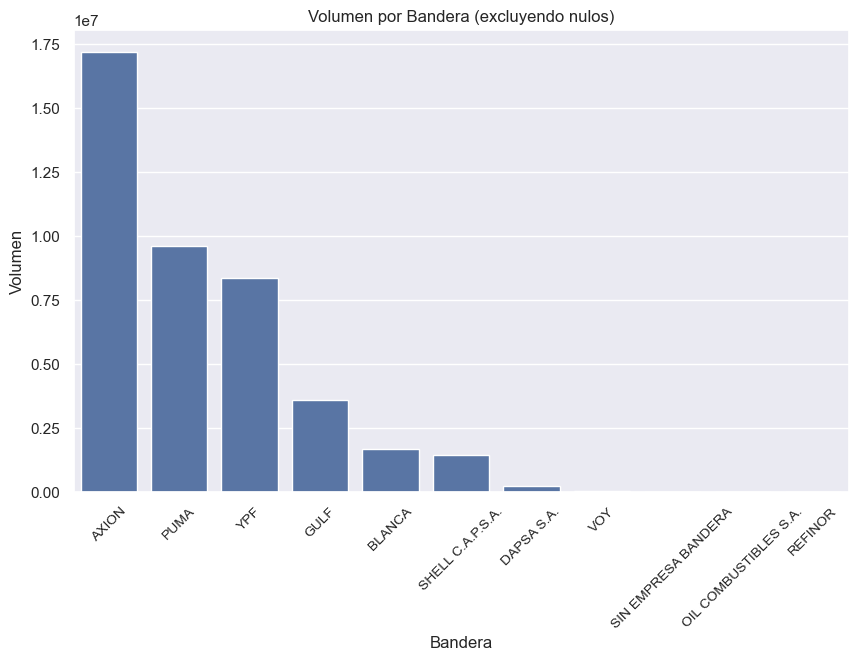

In [53]:

datos_agrupados = df_gasoil.groupby('bandera')['volumen'].sum().reset_index()

# Ordena las banderas de mayor a menor según el volumen
orden_bandera = datos_agrupados.sort_values(by='volumen', ascending=False)['bandera'].tolist()

# Crea un gráfico de barras con las banderas ordenadas
plt.figure(figsize=(10, 6))
sns.barplot(x='bandera', y='volumen', data=datos_agrupados, order=orden_bandera)
plt.title('Volumen por Bandera (excluyendo nulos)')
plt.xlabel('Bandera')
plt.ylabel('Volumen')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

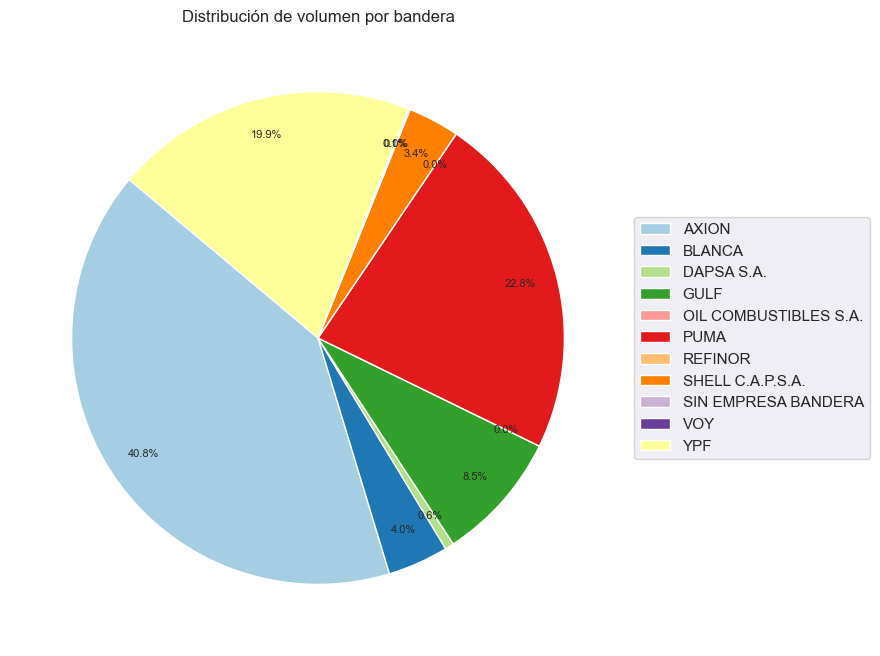

In [54]:

plt.figure(figsize=(8, 8))
pie = plt.pie(datos_agrupados['volumen'], labels=None, autopct='%.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors, textprops={'fontsize': 8})

# Configurar el gráfico
plt.title('Distribución de volumen por bandera')

# Crear leyenda
plt.legend(datos_agrupados['bandera'], loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


### 3.8 Analizamos por partido  el volumen

In [55]:
# Supongamos que 'provincia' es una columna que indica la provincia en df_gasoil
# Asegúrate de ajustar la columna según la estructura real de tu DataFrame
provincia_bsas = 'BUENOS AIRES'

# Filtra el DataFrame para incluir solo las localidades de Buenos Aires
df_bsas = df_gasoil[df_gasoil['provincia'] == provincia_bsas]

# Crea un nuevo DataFrame solo con las columnas 'localidad' y 'volumen'
df_bsas_volumen = df_bsas[['localidad', 'volumen']]

# Muestra el nuevo DataFrame
print(df_bsas_volumen)




        localidad       volumen
200246     ZARATE  5.745000e+05
220025     ZARATE  5.145000e+05
159278     ZARATE  7.085000e+05
179849     ZARATE  5.585000e+05
193298    NECOHEA  4.832520e+05
...           ...           ...
74618   LAFERRERE  1.000000e-09
116627  LAFERRERE  1.000000e-09
95636   LAFERRERE  1.000000e-09
74619   LAFERRERE  1.000000e-09
53520   LAFERRERE  1.000000e-09

[38332 rows x 2 columns]


In [56]:


# Supongamos que prov_geo es el archivo 'departamentos-buenos_aires.json'
prov_geo = 'departamentos-buenos_aires.json'

# Carga el archivo GeoJSON en un DataFrame de GeoPandas
geoJSON_df = gpd.read_file(prov_geo)

# Cambia el nombre de la columna 'departamento' a 'localidad'
geoJSON_df = geoJSON_df.rename(columns={'departamento': 'localidad'})

# Muestra las primeras 150 filas del DataFrame
print(geoJSON_df.head(150))


      id         localidad             cabecera     provincia  \
0     89   ALMIRANTE BROWN              ADROGUE  BUENOS AIRES   
1     93          LA PLATA             LA PLATA  BUENOS AIRES   
2     94  PRESIDENTE PERON             GUERNICA  BUENOS AIRES   
3    105    CARLOS CASARES       CARLOS CASARES  BUENOS AIRES   
4    106         SALADILLO            SALADILLO  BUENOS AIRES   
..   ...               ...                  ...           ...   
129  380         RIVADAVIA              AMERICA  BUENOS AIRES   
130  381        PELLEGRINI           PELLEGRINI  BUENOS AIRES   
131  382              PUAN                 PUAN  BUENOS AIRES   
132  383         VILLARINO              MEDANOS  BUENOS AIRES   
133  391         PATAGONES  CARMEN DE PATAGONES  BUENOS AIRES   

                                              geometry  
0    POLYGON ((-58.30972 -34.79340, -58.33281 -34.8...  
1    MULTIPOLYGON (((-58.00010 -34.87286, -57.99080...  
2    POLYGON ((-58.31248 -34.87479, -58.29783 -3

In [57]:


# Supongamos que df_bsas_volumen tiene las columnas 'localidad' y 'volumen'
# y geoJSON_df tiene las columnas 'localidad' y 'departamento'

# Merge de los DataFrames basado en la columna 'localidad'
df_combinado = pd.merge(df_bsas_volumen, geoJSON_df, on='localidad', how='outer')

# Suma los valores de 'volumen' para cada localidad
df_combinado['volumen'] = df_combinado.groupby('localidad')['volumen'].transform('sum')

# Elimina duplicados para asegurarte de tener una única fila por localidad
df_combinado = df_combinado.drop_duplicates(subset=['localidad'])

# Selecciona las columnas deseadas
columnas_deseadas = ['localidad', 'volumen', 'geometry']
df_combinado = df_combinado[columnas_deseadas]

# Visualizar el DataFrame resultante
df_combinado.head()






localidad       volumen  \
0           ZARATE  1.395970e+07   
386        NECOHEA  7.898875e+05   
397        ALBERTI  8.758178e+05   
555   BAHIA BLANCA  3.891274e+06   
1370      BANFIELD  3.483070e+05   

                                               geometry  
0     POLYGON ((-59.16809 -33.80939, -59.15979 -33.8...  
386                                                None  
397   POLYGON ((-60.36208 -34.79606, -60.32233 -34.7...  
555   POLYGON ((-62.21901 -38.43525, -62.19803 -38.4...  
1370                                               None

In [58]:

df_combinado['volumen_log'] = np.log1p(df_combinado['volumen'])

In [59]:
# Ruta local al archivo GeoJSON
prov_geo = 'departamentos-buenos_aires.json'

# Cargar el archivo GeoJSON localmente
geoJSON_df1 = gpd.read_file(prov_geo)

In [60]:
geoJSON_df1.head()

id      departamento        cabecera     provincia  \
0   89   ALMIRANTE BROWN         ADROGUE  BUENOS AIRES   
1   93          LA PLATA        LA PLATA  BUENOS AIRES   
2   94  PRESIDENTE PERON        GUERNICA  BUENOS AIRES   
3  105    CARLOS CASARES  CARLOS CASARES  BUENOS AIRES   
4  106         SALADILLO       SALADILLO  BUENOS AIRES   

                                            geometry  
0  POLYGON ((-58.30972 -34.79340, -58.33281 -34.8...  
1  MULTIPOLYGON (((-58.00010 -34.87286, -57.99080...  
2  POLYGON ((-58.31248 -34.87479, -58.29783 -34.8...  
3  POLYGON ((-61.53175 -35.37836, -61.46799 -35.4...  
4  POLYGON ((-59.56010 -35.45909, -59.55915 -35.4...

In [61]:


# Crear un mapa de Folium
bsas_state = folium.Map(location=[-26.8083, -65.2176], zoom_start=2)

In [63]:
folium.Choropleth(
    geo_data = geoJSON_df1,                  #json
    name ='choropleth',                  
    data = df_combinado,                     
    columns = ['localidad', 'volumen_log'], #columns to work on
    key_on ='feature.properties.departamento',
    fill_color ='YlOrRd',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.6,
    line_opacity = 0.5,
    threshold_scale=[0, 10, 20, 30, 100, 200, 300, 500],
    legend_name = "volumen").add_to(bsas_state)
bsas_state

